In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2021-07-20/data/listings.csv.gz')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9949 non-null   int64  
 1   listing_url                                   9949 non-null   object 
 2   scrape_id                                     9949 non-null   int64  
 3   last_scraped                                  9949 non-null   object 
 4   name                                          9948 non-null   object 
 5   description                                   9597 non-null   object 
 6   neighborhood_overview                         5611 non-null   object 
 7   picture_url                                   9949 non-null   object 
 8   host_id                                       9949 non-null   int64  
 9   host_url                                      9949 non-null   o

In [ ]:
# that's how you get dummies on one or several columns
pd.get_dummies(data.neighbourhood_cleansed.sample(20))

,Amager Vest,Amager st,Frederiksberg,Indre By,Nrrebro,Vanlse,Vesterbro-Kongens Enghave,sterbro
4430,0,0,0,0,0,0,0,1
8627,0,0,0,0,0,0,0,1
5478,0,0,1,0,0,0,0,0
9767,0,0,0,0,0,1,0,0
3206,1,0,0,0,0,0,0,0
1466,0,1,0,0,0,0,0,0
7297,0,0,0,0,0,0,1,0
4070,0,1,0,0,0,0,0,0
8381,0,0,1,0,0,0,0,0
4688,0,0,1,0,0,0,0,0


In [ ]:
# let's check the price
data.price

0         $365.00
1       $2,400.00
2         $729.00
3         $750.00
4       $1,153.00
          ...    
9944      $508.00
9945    $1,000.00
9946    $1,756.00
9947    $1,137.00
9948      $650.00
Name: price, Length: 9949, dtype: object

1. Prepare dependant variable
2. select independant (features)
3. filter (remove outliers?; focus on certain types of listings? What is representative?)
4. encode and prepare for standardization/other preprocessing


In [ ]:
# Fix price variable and recode into float/numerical
data.price = data.price.str.replace(',','')
data.price = data.price.str.replace('$','')
data.price = data.price.astype(float)

In [ ]:
# select independant variables X
# select target y

columns = [39,17,25,27,31,32,33,34,36,37,40,50,51,52,53,55,60,61,62,63,64,65,66,68,73]
data = data.iloc[:,columns]

## detour into imputation

no need to run that...just an example

In [ ]:
!pip install fancyimpute

     |████████████████████████████████| 22.3 MB 6.1 MB/s 
     |████████████████████████████████| 2.7 MB 43.0 MB/s 
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=d6ce75e28216608c59277adb7c5cf609e8bd4b7a579729411e0a665eeab8b8c2
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built knnimpute
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from fancyimpute import KNN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9949 non-null   int64  
 1   listing_url                                   9949 non-null   object 
 2   scrape_id                                     9949 non-null   int64  
 3   last_scraped                                  9949 non-null   object 
 4   name                                          9948 non-null   object 
 5   description                                   9597 non-null   object 
 6   neighborhood_overview                         5611 non-null   object 
 7   picture_url                                   9949 non-null   object 
 8   host_id                                       9949 non-null   int64  
 9   host_url                                      9949 non-null   o

In [ ]:
x = data[['bedrooms','reviews_per_month','calculated_host_listings_count','neighbourhood_cleansed']]

In [ ]:
x = pd.get_dummies(x)

In [ ]:
X_filled_knn = KNN(k=3).fit_transform(x)

In [ ]:
x_filled_pd = x
x_filled_pd.iloc[:,:] = X_filled_knn

In [ ]:
x_filled_pd

,bedrooms,reviews_per_month,calculated_host_listings_count,neighbourhood_cleansed_Amager Vest,neighbourhood_cleansed_Amager st,neighbourhood_cleansed_Bispebjerg,neighbourhood_cleansed_Brnshj-Husum,neighbourhood_cleansed_Frederiksberg,neighbourhood_cleansed_Indre By,neighbourhood_cleansed_Nrrebro,neighbourhood_cleansed_Valby,neighbourhood_cleansed_Vanlse,neighbourhood_cleansed_Vesterbro-Kongens Enghave,neighbourhood_cleansed_sterbro
0,1.0,1.610000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.0,0.750000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.370000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.270000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0.660000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,1.0,0.586667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9945,1.0,0.173333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9946,2.0,0.386667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9947,1.0,0.730000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### back - inspect the features

In [ ]:
data

,price,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,365.0,False,False,Nrrebro,Private room in apartment,Private room,2,1.0,1.0,2,0,0,0,0,168,4.78,4.78,4.78,4.87,4.9,4.72,4.71,False,1.61
2,729.0,False,True,Vesterbro-Kongens Enghave,Entire apartment,Entire home/apt,2,1.0,1.0,7,0,0,0,46,22,4.91,4.85,4.77,5.00,5.0,4.85,4.77,False,0.37
3,750.0,False,True,Vesterbro-Kongens Enghave,Entire apartment,Entire home/apt,3,1.0,3.0,2,0,0,0,0,17,4.87,4.80,4.87,4.85,4.8,4.85,4.46,False,0.27
4,1153.0,False,True,Vesterbro-Kongens Enghave,Entire apartment,Entire home/apt,5,3.0,4.0,3,2,2,2,91,73,4.89,4.96,4.93,4.86,4.9,4.87,4.70,True,0.66
5,617.0,False,True,sterbro,Entire apartment,Entire home/apt,4,2.0,2.0,100,0,0,0,217,7,4.57,4.75,4.50,5.00,5.0,4.50,4.50,False,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,370.0,False,True,Nrrebro,Entire apartment,Entire home/apt,2,1.0,1.0,1,1,4,4,4,3,5.00,5.00,5.00,5.00,5.0,5.00,5.00,False,3.00
9708,900.0,True,True,sterbro,Entire apartment,Entire home/apt,2,1.0,2.0,2,12,12,12,12,1,5.00,5.00,5.00,5.00,5.0,5.00,5.00,False,1.00
9728,600.0,False,True,Vesterbro-Kongens Enghave,Entire apartment,Entire home/apt,3,2.0,2.0,2,3,6,6,206,1,5.00,4.00,5.00,4.00,5.0,4.00,5.00,True,1.00
9744,1100.0,False,True,Indre By,Entire apartment,Entire home/apt,3,2.0,3.0,3,4,4,21,21,1,5.00,5.00,5.00,5.00,5.0,5.00,5.00,False,1.00


In [ ]:
bool_dict = {'t' : True, 'f' : False}


In [ ]:
data.dropna(subset=['host_is_superhost','host_identity_verified','instant_bookable' ], inplace=True)

In [ ]:
data.host_is_superhost.value_counts()

False    4724
True      940
Name: host_is_superhost, dtype: int64

In [ ]:
data['host_is_superhost'].isnull().sum()

0

In [ ]:
data['host_is_superhost'] = [bool_dict[t] for t in data['host_is_superhost']]
data['host_identity_verified'] = [bool_dict[t] for t in data['host_identity_verified']]
data['instant_bookable'] = [bool_dict[t] for t in data['instant_bookable']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


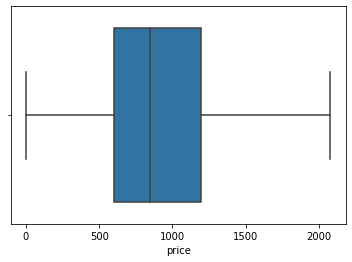

In [ ]:
sns.boxplot(data.price, showfliers=False)

In [ ]:
iqr = data.price.quantile(0.75) - data.price.quantile(0.25)
upper = data.price.quantile(0.75) + 1.5*iqr

In [ ]:
upper

2082.5

In [ ]:
data.price.quantile(0.95)

2065.599999999995

In [ ]:
data = data[data.price <= upper]

In [ ]:
data = data.drop(['bathrooms'], axis=1)

In [ ]:
data = data[data.property_type.isin(['Entire apartment','Private room in apartment'])]

In [ ]:
data.dropna(inplace=True)

In [ ]:
y = data.price
X = data.drop(['price'], axis=1)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model_ols = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=25)

In [ ]:
model_ols.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

In [ ]:
print('Model OLS' + ' ' + str(model_ols.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))

Model OLS 0.5356779770111804
Model RF 0.4951571972703456


In [ ]:
y_pred_rf = model_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


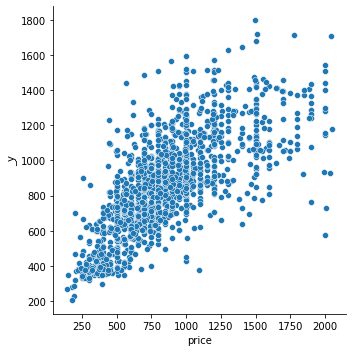

In [ ]:
sns.relplot(y_test, y_pred_rf)

In [ ]:
from sklearn.metrics import mean_squared_error 

In [ ]:
mean_squared_error(y_test, y_pred_rf)

65857.41196497175

In [ ]:
from math import sqrt

In [ ]:
sqrt(mean_squared_error(y_test, y_pred_rf))

256.62698993864956